<a href="https://colab.research.google.com/github/ZynTran/Yolo/blob/main/nhi%E1%BB%81u_m%E1%BA%B7t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ppduyn/bt-3004")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bt-3004


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

face_classes = ['Thuy Linh', 'Thuy Vy', 'Phuong Duyen', 'Ngoc Lan', 'Kim Tuyen', 'Da Nguyet', 'Tra My']
image_size = 64

data = []
labels = []

for i, face in enumerate(face_classes):
    folder = os.path.join(path, 'Nhận diện khuôn mặt', face)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img)
            labels.append(i)
        except:
            continue

data = np.array(data)
labels = np.array(labels)

# Chia train/test
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
y_train = to_categorical(y_train, num_classes=len(face_classes))
y_test = to_categorical(y_test, num_classes=len(face_classes))

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
model=Sequential([Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(image_size, image_size, 3)),
                  MaxPooling2D((2,2)),
                  Conv2D(64, (3, 3), activation='relu'),
                  Flatten(),
                  Dense(64, activation='relu'),
                  Dense(len(face_classes), activation='softmax')
                  ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs=20
history=model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
model.save('face_model.h5')

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 0.5977 - loss: 1.1137 - val_accuracy: 0.3900 - val_loss: 2.0005
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.6447 - loss: 1.0539 - val_accuracy: 0.3900 - val_loss: 1.9404
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.6428 - loss: 1.0265 - val_accuracy: 0.3600 - val_loss: 2.0182
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.6858 - loss: 0.8895 - val_accuracy: 0.4000 - val_loss: 1.9949
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - accuracy: 0.6749 - loss: 0.9870 - val_accuracy: 0.3600 - val_loss: 2.0491
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.6885 - loss: 0.8676 - val_accuracy: 0.4000 - val_loss: 2.0544
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.6958 - loss: 0.8611 - val_accuracy: 0.3000 - val_loss: 2.1730
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.7404 - loss: 0.8367 - val_accuracy: 0.

In [ ]:
pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.4 MB/s eta 0:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


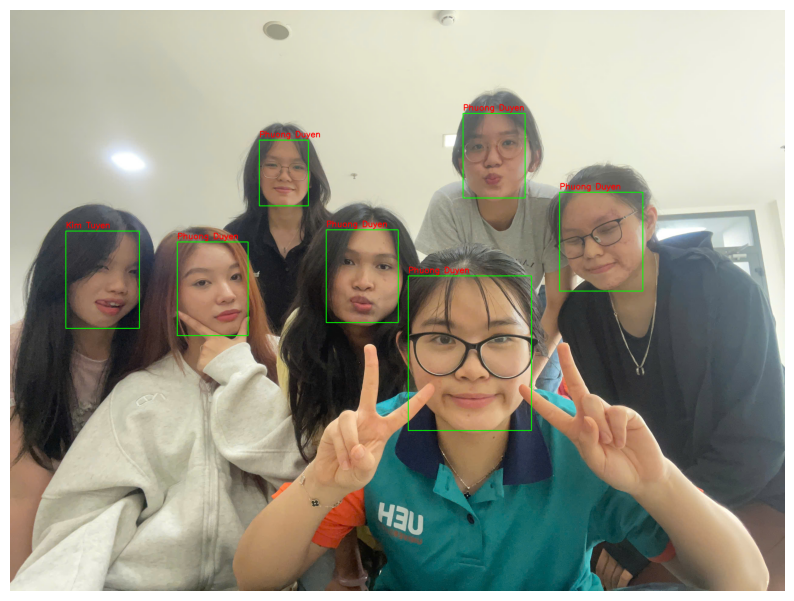

In [ ]:
import matplotlib.pyplot as plt
from keras.models import load_model
from mtcnn import MTCNN

face_model = load_model('face_model.h5')

image_path = '/content/457a8216-618f-43ed-a73b-7c66cfa16e06.jfif'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

detector = MTCNN()
faces = detector.detect_faces(img_rgb)

def preprocess_face(face_img, image_size=64):
    face_resized = cv2.resize(face_img, (image_size, image_size))
    face_resized = face_resized / 255.0
    face_array = np.expand_dims(face_resized, axis=0)
    return face_array

def predict_face(face_img):
    preprocessed = preprocess_face(face_img)
    predictions = face_model.predict(preprocessed)
    predicted_index = np.argmax(predictions)
    return face_classes[predicted_index]

# Vẽ khung và dự đoán
for face in faces:
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    face_crop = img_rgb[y:y+h, x:x+w]

    if face_crop.size != 0:
        label = predict_face(face_crop)
        cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img_rgb, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    else:
        print("Không thể nhận dạng.")

# Hiển thị ảnh kết quả bằng matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()